# Data Exploration
## Public Art Archive

DS 2023 Final Project

Mackenzie Kleczynski - etm8nu

December 2025

---
## Goal for This Notebook

1. Load and inspect cleaned Virginia and global datasets.
2. Apply PAA brand colors and fonts for consistent styling.
3. Conduct preliminary EDA to identify trends and patterns.
4. Create, customize, and annotate visualizations for the infographic.
5. Explain design choices and processes

---

## Part 1: Loading Libraries and Data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [25]:
global_data = pd.read_csv('Data/Processed Data/global_all_data.csv')
virginia_data = pd.read_csv('Data/Processed Data/virginia_records_filtered.csv')

---

## Part 2: Setting Up Public Art Archive Brand Colors & Fonts

After discovering the Public Art Archive's media kit on their website, I decided to implement the organization's established brand fonts and colors in my visualizations. Through this process, I learned how to define these parameters initially so I could easily reference them while building visualizations. This approach ensures my infographic will be visually consistent with the organization's brand identity.

**Source:** Public Art Archive Media Kit
https://s3.amazonaws.com/marketing.westaf.org/PAA+Marketing/FY25+Public+Art+Archive+Media+Kit.pdf

In [26]:
from matplotlib import font_manager as fm
from matplotlib.colors import LinearSegmentedColormap

# Load the Open Sans TTF files
open_sans_regular = fm.FontProperties(fname="fonts/OpenSans-Regular.ttf")
open_sans_bold = fm.FontProperties(fname="fonts/OpenSans-Bold.ttf")

# Define PAA brand colors
PAA_COLORS = {
    'black': '#000000',
    'white': '#FFFFFF',
    'teal': '#207681',
    'purple': '#791A76',
    'magenta': '#DB72E0',
    'light_blue': '#D6E4E6',
    'light_purple': '#E3D1E4',
    'very_light_purple': '#F8E3F9'
}

# Define PAA text styles using loaded fonts
PAA_TEXT_STYLES = {
    'title': {'fontsize': 25, 'fontproperties': open_sans_bold},
    'subtitle': {'fontsize': 20, 'fontproperties': open_sans_regular},
    'axis_label': {'fontsize': 12, 'fontproperties': open_sans_bold},
    'tick_label': {'fontsize': 10, 'fontproperties': open_sans_regular}
}

# Set up Matplotlib default font (optional)
plt.rcParams['font.family'] = 'sans-serif'

# Create PAA color palette for Seaborn
paa_palette = [
    PAA_COLORS['teal'],
    PAA_COLORS['purple'],
    PAA_COLORS['magenta'],
    PAA_COLORS['light_blue'],
    PAA_COLORS['light_purple']
]
sns.set_palette(paa_palette)

# Create custom colormaps
cmap_purple = LinearSegmentedColormap.from_list('PAA', [PAA_COLORS['very_light_purple'], PAA_COLORS['purple']], N=100)
cmap_blue = LinearSegmentedColormap.from_list('PAA', [PAA_COLORS['light_blue'], PAA_COLORS['teal']], N=100)

legend_title_font = fm.FontProperties(fname="fonts/OpenSans-Bold.ttf", size=17)

---

## Part 3: Visualizations

### Graph #1

**Documentation**: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

#### Data:

In [27]:
# Create virginia_by_city
virginia_by_city = virginia_data.groupby('city').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'artwork_id': 'count'
}).reset_index()
virginia_by_city.rename(columns={'artwork_id': 'num_artworks'}, inplace=True)

# Get top 5 cities
top_5_cities = virginia_by_city.nlargest(5, 'num_artworks')
top_5_cities

,city,latitude,longitude,num_artworks
1,Alexandria,38.815026,-77.066144,92
2,Arlington,38.879796,-77.094593,68
30,Reston,38.955019,-77.348623,48
26,Newport News,37.075833,-76.482382,23
29,Radford,37.137943,-80.553597,23


#### Plot:

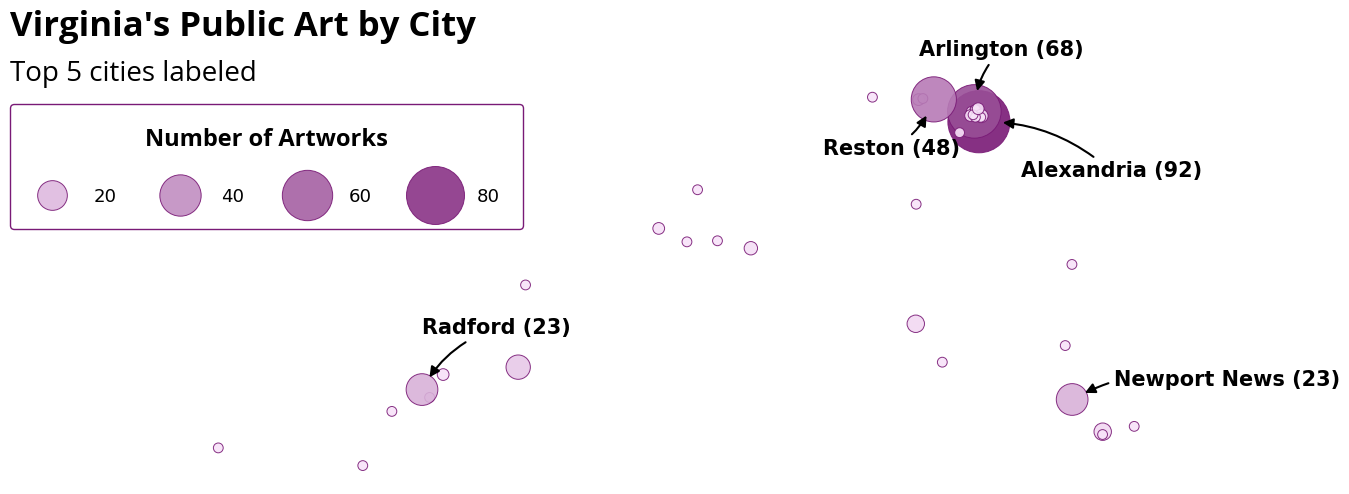

In [28]:
# Create figure
fig, ax = plt.subplots(figsize=(13, 9), facecolor='none')
ax.set_facecolor('none')

#Create plot
sns.scatterplot(
    data=virginia_by_city,
    x='longitude',
    y='latitude',
    size='num_artworks',
    hue='num_artworks',
    sizes=(50, 2000), 
    palette=cmap_purple,
    alpha=0.9,
    edgecolor=PAA_COLORS['purple'],
    linewidth=.7,
)

#Set equal aspect ratio so map isn't distorted
ax.set_aspect('equal', adjustable='box')

#Create Labels in spesfic locations
fig.text(0, 0.75, "Virginia's Public Art by City", 
         ha='left', **PAA_TEXT_STYLES['title'])
fig.text(0, 0.7, 'Top 5 cities labeled', 
         ha='left', **PAA_TEXT_STYLES['subtitle'])

#no axis as it distracts from the points
ax.axis('off')

#Fix legend
legend = ax.legend(
    loc='upper left',
    bbox_to_anchor=(-.17, 0.89),
    fontsize=13,
    title='Number of Artworks',
    ncol=5,  # puts all items in one row aka makes it horizontal
    columnspacing=2.5,  # space between columns
    handletextpad=1.3,  # space between marker and text
    borderpad=1.3,
    labelspacing=2,  # vertical space between rows aka title and dots
    frameon=True,  # keep the frame
    facecolor='none',  # transparent background
    edgecolor=PAA_COLORS['purple'],  # border color (optional)
    framealpha=1,  # fully opaque border
)
legend.get_title().set_fontproperties(legend_title_font)
legend.get_title().set_color(PAA_COLORS['black'])

# Add arrow/top 5 city labels
offsets = {
    'Alexandria': (30, -40),
    'Arlington': (-40, 40),
    'Reston': (-80, -40),
    'Newport News': (30, 10),
    'Radford': (0, 40),
}

# Loop through each of the top 5 cities
for idx, row in top_5_cities.iterrows():
    offset = offsets.get(row['city'])
    shrink_amount = 8 + (row['num_artworks'] / 10) # pulls back the arrow head based on num of art
   
    ax.annotate(
        f"{row['city']} ({row['num_artworks']})",# Text thats shown        
        xy=(row['longitude'], row['latitude']), # where the arrow points to or the actual dot on the map
        xytext=offset, #where the text is set from the offset from the point
        textcoords='offset points',  # tells matplotlib how to interpret xytext not the coordinates
        fontsize=15,
        fontweight='bold',
        color=PAA_COLORS['black'],
        arrowprops=dict( #arrow customizations
            arrowstyle='-|>',
            color=PAA_COLORS['black'],
            linewidth=1.5,
            connectionstyle='arc3,rad=0.2', # slight curve (0 = straight)
            shrinkB=shrink_amount # pulls back arrow head from center of the dot
        )
    )

# get rid of cut off on the top
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], ylim[1] + 0.2)  # adds 0.2 degrees latitude to top

plt.savefig('visualizations/graph_1.svg', bbox_inches='tight')

plt.show()

### Graph #2

**Documentation**: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.stackplot.html#matplotlib.axes.Axes.stackplot

#### Data:

In [29]:
print(virginia_data['workType'].value_counts())

workType
sculpture (visual work)                                                       87
outdoor sculpture                                                             42
mural paintings (visual works)                                                37
sculpture (visual work), outdoor sculpture                                    15
installations (visual works)                                                  10
                                                                              ..
environmental art, floors (surface elements)                                   1
sculpture (visual work), floors (surface elements)                             1
bridges (built works), sculpture (visual work)                                 1
mosaics (visual works), architecture (object genre), bridges (built works)     1
murals (any medium), photographs                                               1
Name: count, Length: 81, dtype: int64


In [30]:
def categorize_worktype(worktype):
    worktype = str(worktype).lower()
    
    if 'mural' in worktype:
        return 'Murals'
    elif 'sculpture' in worktype or 'statue' in worktype:
        return 'Sculpture'
    elif 'installation' in worktype:
        return 'Installations'
    elif 'mosaic' in worktype:
        return 'Mosaics'
    else:
        return 'Other'

virginia_data['workType_broad'] = virginia_data['workType'].apply(categorize_worktype)
print(virginia_data['workType_broad'].value_counts())

workType_broad
Sculpture        200
Other             50
Murals            44
Installations     19
Mosaics            6
Name: count, dtype: int64


In [31]:
virginia_data['yearCreated'].value_counts().head()
# need to get rid of rows with no data

yearCreated
No data    21
2021       17
2018       14
2020       13
2019       13
Name: count, dtype: int64

In [32]:
plot_data = virginia_data[virginia_data['yearCreated'] != 'No data'].copy()
plot_data['yearCreated'] = plot_data['yearCreated'].astype(int)
print(plot_data['yearCreated'].min())
print(plot_data['yearCreated'].max())

1926
2025


In [33]:
pivot = plot_data.groupby(['yearCreated', 'workType_broad']).size().unstack(fill_value=0)
pivot.index

Index([1926, 1930, 1939, 1940, 1947, 1959, 1965, 1967, 1970, 1976, 1977, 1979,
       1980, 1981, 1982, 1983, 1984, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
      dtype='int64', name='yearCreated')

#### Plot

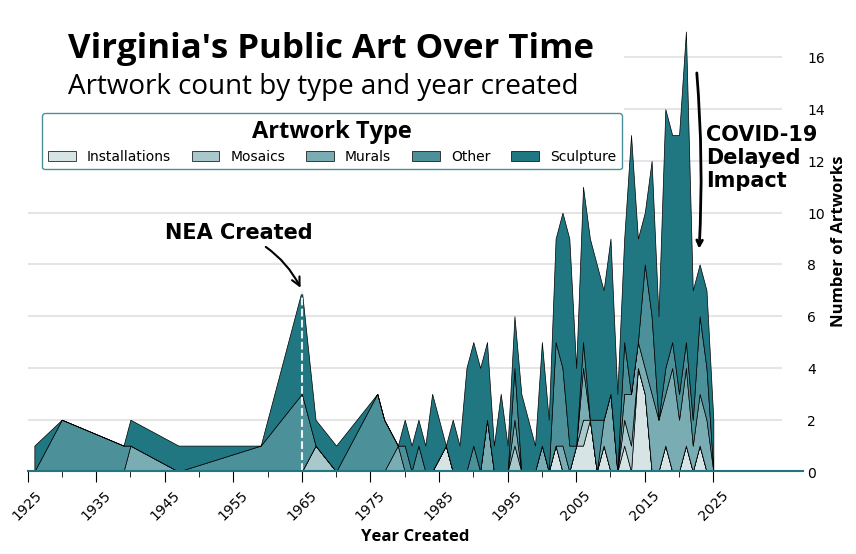

In [34]:
#make color list
num_categories = len(pivot.columns)
colors_from_cmap = [cmap_blue(i / (num_categories - 1)) for i in range(num_categories)]

# Create figure
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
ax.set_facecolor('none')

# Create plot
ax.stackplot(
    pivot.index, 
    pivot.T.values, 
    labels=pivot.columns, 
    colors=colors_from_cmap, 
    alpha=1,
    edgecolor=PAA_COLORS['black'],
    linewidth=.5
)

# make custom horizontal grid so that the lines do not intersect with the titles and such
# set zorder to push them behind the stackplot
ax.hlines(y=16, xmin=2012, xmax=2035, linestyle='-', alpha=0.1, color=PAA_COLORS['black'], zorder=0.5)
ax.hlines(y=14, xmin=2012, xmax=2035, linestyle='-', alpha=0.1, color=PAA_COLORS['black'], zorder=0.5)
ax.hlines(y=12, xmin=2012, xmax=2035, linestyle='-', alpha=0.1, color=PAA_COLORS['black'], zorder=0.5)
ax.hlines(y=10, xmin=1925, xmax=2035, linestyle='-', alpha=0.1, color=PAA_COLORS['black'], zorder=0.5)
ax.hlines(y=8, xmin=1925, xmax=2035, linestyle='-', alpha=0.1, color=PAA_COLORS['black'], zorder=0.5)
ax.hlines(y=6, xmin=1925, xmax=2035, linestyle='-', alpha=0.1, color=PAA_COLORS['black'], zorder=0.5)
ax.hlines(y=4, xmin=1925, xmax=2035, linestyle='-', alpha=0.1, color=PAA_COLORS['black'], zorder=0.5)
ax.hlines(y=2, xmin=1925, xmax=2035, linestyle='-', alpha=0.1, color=PAA_COLORS['black'], zorder=0.5)

# Add titles
fig.text(0.165, 0.8, "Virginia's Public Art Over Time", 
         ha='left', **PAA_TEXT_STYLES['title'])
fig.text(0.165, 0.74, 'Artwork count by type and year created', 
         ha='left', **PAA_TEXT_STYLES['subtitle'])

# Axis labels
ax.set_xlabel('Year Created', **PAA_TEXT_STYLES['axis_label'])
ax.set_ylabel('Number of Artworks', **PAA_TEXT_STYLES['axis_label'])

ax.set_xlim(1925, 2038)

# Fix spines
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_edgecolor(PAA_COLORS['teal'])
ax.spines['bottom'].set_linewidth(1.5)

# y axis
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.tick_params(axis='y', length=0)  #removes tick marks but keeps the labels

# Fix the ticks on x axis
ax.set_xticks(range(1925, 2030, 10))
ax.set_xticks(range(1930, 2025, 5), minor=True)
ax.tick_params(axis='x', which='major', rotation=45, length=8, labelsize=PAA_TEXT_STYLES['tick_label']['fontsize'])
ax.tick_params(axis='x', which='minor', length=4)
ax.tick_params(axis='y', labelsize=PAA_TEXT_STYLES['tick_label']['fontsize'])

# Fix legend
legend = ax.legend(
    loc='upper left',
    bbox_to_anchor=(0.01, 0.79),
    title='Artwork Type',
    fontsize=10,
    ncol=5, # horizontal
    columnspacing=1.5,
    handletextpad=0.8,
    frameon=True,
    facecolor='none',
    edgecolor=PAA_COLORS['teal'],
)
legend.get_title().set_fontproperties(legend_title_font)
legend.get_title().set_color(PAA_COLORS['black'])


# show 1965 spike
ax.annotate(
    'NEA Created',
    xy=(1965, 7),  # point to the spike
    xytext=(1945, 9),  # where the text sits
    textcoords='data',
    fontsize=15,
    fontweight='bold',
    color=PAA_COLORS['black'],
    arrowprops=dict(
        arrowstyle='->',
        color=PAA_COLORS['black'],
        linewidth=1.5,
        connectionstyle='arc3,rad=-0.2'
    )
)
ax.vlines(x=1965, ymin=0, ymax=7, color=PAA_COLORS['white'], linestyle='--', linewidth=1.5, alpha=0.9)

#add arrow to show drop in 2022
ax.annotate(
    '',  # no text
    xy=(2022.5, 7),  # where arrow points to
    xytext=(2022, 17),  # where arrow starts from
    arrowprops=dict(
        arrowstyle='->',
        color=PAA_COLORS['black'],
        linewidth=2,
        connectionstyle='arc3,rad=-0.05',
        shrinkA=30,
        shrinkB=30
    )
)

# Add label for the arrow
ax.text(2024, 11, 'COVID-19\nDelayed\nImpact', 
        fontsize=15, 
        fontweight='bold',
        color=PAA_COLORS['black'],
        ha='left')

plt.savefig('visualizations/graph_2.svg', bbox_inches='tight')

plt.show()

### Graph #3

**Documentation**: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html

#### Data:

In [35]:
#get placement rows from global data
global_placement = global_data[global_data['category'] == 'placement'].copy()

#get placement data from va data
virginia_placement = virginia_data['placement'].value_counts().reset_index()
virginia_placement.columns = ['placement', 'count']

In [36]:
#get totals for proportion calculations
global_total = global_placement['count'].sum()
virginia_total = virginia_placement['count'].sum()

print (global_total)
print(virginia_total)

29845
307


In [37]:
top_10_global = global_placement.sort_values('count', ascending=False).head(10)['value'].tolist()
top_10_global

['government office buildings',
 'universities and colleges',
 'exterior walls',
 'municipal buildings',
 'storage spaces',
 'libraries (buildings)',
 'parks (recreation areas)',
 'parks (grounds)',
 'roadsides',
 'public spaces']

In [38]:
# loop through to get unique proportions
comparison_top10 = []
for placement in top_10_global:
    global_count = global_placement[global_placement['value'] == placement]['count'].values[0] #global count
    virginia_count = virginia_placement[virginia_placement['placement'] == placement]['count'].values # Va count
    virginia_count = virginia_count[0] if len(virginia_count) > 0 else 0 # If va has this placement then use it and if otherwise use 0
   
    virginia_pct = (virginia_count / virginia_total) * 100 #get va %
    global_pct = (global_count / global_total) * 100 #get va %
    
    comparison_top10.append({ #add to list
        'placement': placement.title(), # make titlecase for easier labels later on graph
        'virginia_pct': virginia_pct,
        'global_pct': global_pct
    })

# Convert list to df
top_10_df = pd.DataFrame(comparison_top10)
top_10_df

,placement,virginia_pct,global_pct
0,Government Office Buildings,0.651466,10.738817
1,Universities And Colleges,2.605863,6.922433
2,Exterior Walls,4.234528,6.661082
3,Municipal Buildings,0.000000,5.417993
4,Storage Spaces,0.000000,5.404590
5,Libraries (Buildings),4.234528,4.459708
6,Parks (Recreation Areas),3.583062,4.097839
7,Parks (Grounds),7.166124,3.769476
8,Roadsides,2.931596,3.350645
9,Public Spaces,3.908795,3.109399


#### Plot:

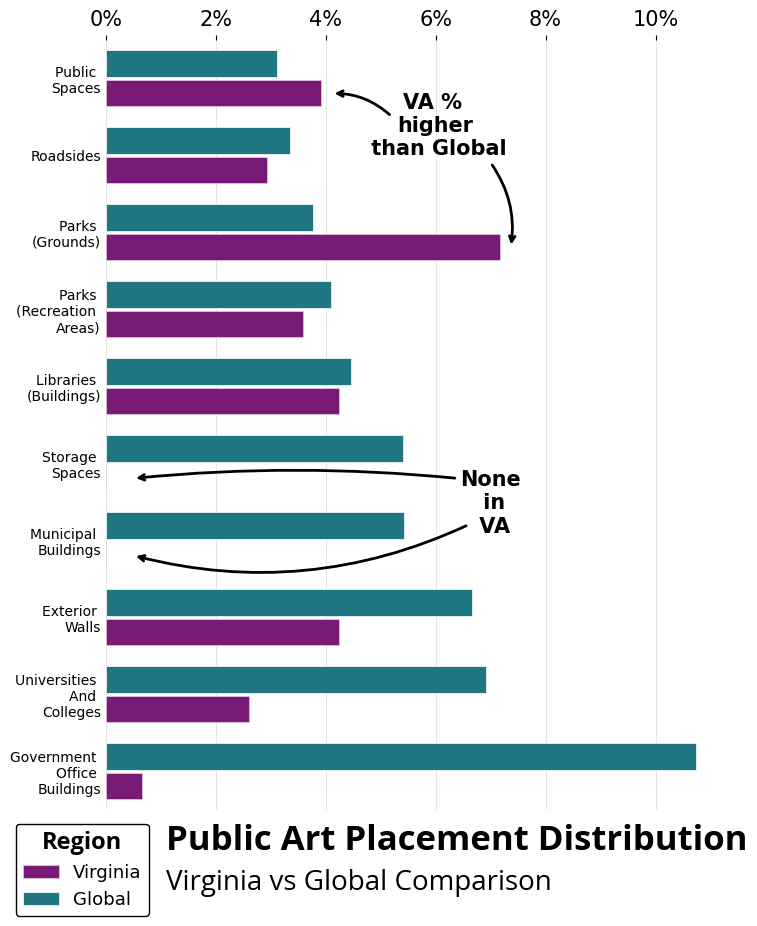

In [44]:
# Create figure
fig, ax = plt.subplots(figsize=(8, 10), facecolor='none')
ax.set_facecolor('none')

# y positions
y_pos = np.arange(len(top_10_df))
bar_height = 0.35

#plot and offset so dont overlap
ax.barh(y_pos - bar_height/1.8, 
        top_10_df['virginia_pct'], bar_height, 
        label='Virginia', color=PAA_COLORS['purple'], edgecolor=PAA_COLORS['light_purple'], linewidth=0.5)
ax.barh(y_pos + bar_height/1.8, 
        top_10_df['global_pct'], bar_height, 
        label='Global', color=PAA_COLORS['teal'], edgecolor=PAA_COLORS['white'], linewidth=0.5)


# fix axes
ax.set_yticks(y_pos)
ax.tick_params(axis='x', labelsize=15)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
ax.tick_params(axis='y', length=0)
ax.xaxis.tick_top() # move x-axis to top
ax.xaxis.set_label_position('top')
ax.set_ylim(-0.5, len(top_10_df) - 0.5) # to stop the intersection of the grid and title later

from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}%')) #make the labels include %

# wrap the y label text to be multiple lines cuase some are long
def wrap_labels(labels, max_char=10):
    wrapped = []
    for label in labels:
        words = label.split()  # split by spaces
        new_label = ''
        line_len = 0
        for word in words:
            if line_len + len(word) > max_char:
                new_label += '\n'  # start new line
                line_len = 0
            new_label += word + ' '
            line_len += len(word) + 1
        wrapped.append(new_label.strip())
    return wrapped
ax.set_yticklabels(wrap_labels(top_10_df['placement']), fontsize=PAA_TEXT_STYLES['tick_label']['fontsize'])


# Fix spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# titles
fig.text(0.2, 0.07, 'Public Art Placement Distribution', 
         ha='left', **PAA_TEXT_STYLES['title'])
fig.text(0.2, 0.03, 'Virginia vs Global Comparison', 
         ha='left', **PAA_TEXT_STYLES['subtitle'])

legend = ax.legend(
    loc='lower left',
    bbox_to_anchor=(-0.16, -.15),
    fontsize=13,
    title='Region',
    frameon=True,
    facecolor='none',
    edgecolor=PAA_COLORS['black'],
    framealpha=1,
)
legend.get_title().set_fontproperties(legend_title_font)
legend.get_title().set_color(PAA_COLORS['black'])

# Add light grid
ax.xaxis.grid(True, linestyle='-', alpha=0.1, color=PAA_COLORS['black'])
ax.set_axisbelow(True)

# add all the arrows
#add va greater the global arrows
ax.text(6, 8, 'VA % \nhigher\n than Global', fontsize=15, fontweight='bold', ha='center', color=PAA_COLORS['black'])
ax.annotate(
    '',
    xy=(top_10_df.loc[9, 'virginia_pct'] + 0.2, 8.8),
    xytext=(5.2, 8.5),
    arrowprops=dict(
        arrowstyle='->',
        color=PAA_COLORS['black'],
        linewidth=2,
        connectionstyle='arc3,rad=0.2'
    ))
ax.annotate(
    '',
    xy=(top_10_df.loc[7, 'virginia_pct'] + 0.2, 6.8),
    xytext=(7,7.9),
    arrowprops=dict(
        arrowstyle='->', 
        color=PAA_COLORS['black'],
        linewidth=2,
        connectionstyle='arc3,rad=-0.2'
    ))

#add va zero aros
ax.text(7, 3.1, 'None\n in\n VA', fontsize=15, fontweight='bold', ha='center', color=PAA_COLORS['black'])
ax.annotate(
    '',
    xy=(.5, 3.8),
    xytext=(6.4, 3.8),
    arrowprops=dict(
        arrowstyle='->',
        color=PAA_COLORS['black'],
        linewidth=2,
        connectionstyle='arc3,rad=0.05'
    ))
ax.annotate(
    '',
    xy=(.5, 2.8),
    xytext=(6.6,3.2),
    arrowprops=dict(
        arrowstyle='->', 
        color=PAA_COLORS['black'],
        linewidth=2,
        connectionstyle='arc3,rad=-0.18'
    ))

plt.savefig('visualizations/graph_3.svg', bbox_inches='tight')

plt.show()

---

## Part 4: Design Decisions

**Development**

I built each visualization step by step, starting simple and adding complexity. For the geographic map, I began with a basic scatter plot of latitude and longitude, then added color to show concentration and bubble size to show artwork count. For the timeline, I started with a simple area chart and added stacked layers and refined the colors. For the placement comparison, I started with basic bars and then added labels and spacing. This approach let me test each change and make sure it made sense before moving to the next thing.

**Simplicity**

I removed aspects that might be too much for the infographic in order to keep the focus on the data. For the map, I turned off axis labels, tick marks, and borders because the map itself shows the location. For the timeline, I kept gridlines minimal and used fewer colors. For all graphs, I made the backgrounds transparent so they would work well when placed on the infographic.

**Key Points**

I used labels and annotations to guide viewers to the most important findings. On the map, I only labeled the top 5 cities and added arrows to highlight Northern Virginia's concentration. On the timeline, I added text callouts for major events like the NEA creation and COVID impact to explain the patterns. On the placement chart, I used arrows to point out where Virginia differs from global trends. This makes it easier for the viewer to see what matters most.

**Brand Colors and Fonts**

I kept the design consistent by using the Public Art Archive's official colors and fonts across all three graphs. I kept consistent text sizing across titles, subtitles, annotations, and descriptive texts. I created style dictionaries to make sure titles, labels, and annotations all matched. This not only helped connect everything to the Public Art Archive and made the infographic look polished, but it also made it easier when building to call dictionaries rather than manually retype it all.

**Legend and Layout**

I placed legends where they wouldn't cover important data. I removed the background fills from legends but kept the borders so they're still readable. I built my infographic while creating the graphs in order to adjust the position and sizing of all aspects like titles, legends, and figure sizes.